In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
x,label=load_iris(True)
print(x.shape,label.shape)

(150, 4) (150,)


In [3]:
#Distances between the elements 
#Element i-j: distance between the element i and j
dist=euclidean_distances(x)

In [4]:
#Set the number of neighbors and the list of the closed ones
# np.argsort create an array of the argument with lower value of the distances

K=5
N=dist.shape[0]
nodenext=[]
Rank=np.argsort(dist)[:,1:K+1]
for i in range(N):
        e=[]
        for j in Rank[i]:
            if i in Rank[j]:
                e.append(j)
        nodenext.append(e)
print(nodenext,len(nodenext))

[[17, 4, 28, 39, 27], [12, 45, 34, 9, 25], [47, 3, 6, 45], [47, 29, 30, 2], [0, 37, 40, 17], [18, 44], [47, 2, 11], [39, 49, 28], [38, 13], [34, 1, 30, 12, 25], [48, 36], [29, 6, 24], [1, 9, 34, 45], [38, 42, 8], [33, 15], [33, 14], [33], [0, 40, 28, 4], [5], [46, 21, 48], [31], [19, 46, 48], [], [26, 43], [11], [34, 9, 30, 1], [23, 43], [28, 39, 0], [27, 0, 39, 17, 7], [30, 3, 47, 11], [34, 29, 9, 25, 3], [20, 36], [33], [32, 15, 16, 14], [9, 1, 30, 25, 12], [49], [10, 31], [4], [8, 42, 13], [7, 27, 0, 28, 49], [17, 4], [], [38, 47, 13], [26, 23], [5], [1, 12, 2], [19, 21, 48], [2, 3, 6, 29, 42], [10, 19, 46, 21], [7, 39, 35], [52, 86], [56, 75, 65, 91], [50, 86, 77, 76], [89, 80, 81], [58, 75, 76, 74], [66, 90], [51, 85], [93, 98, 60], [54, 75, 86, 65, 76], [], [93, 57, 98], [96, 78, 95, 88], [], [91, 73, 78], [79], [75, 58, 86, 51, 74], [84, 55], [92, 82], [87, 119], [80, 89, 92, 81, 82], [138, 127, 149, 85], [97, 82], [123, 133, 146, 119], [63, 91], [97, 75, 54, 65], [65, 58, 74, 5

In [5]:
# Evaluation of the parameter of the Hamiltonian 
#The mean value of the closed ones and the average nearest neighbors distance

khat = 0
for i in nodenext:
    khat+= len(i)
khat = khat / N


a = 0
for i in range(N):
    a+=sum(dist[i,nodenext[i]])
a = 4 * a / (khat*N)

J = (1 / khat) * np.exp(- ( dist / a/2)**2)
J.shape

(150, 150)

In [6]:
#Assignment of the spins in a random way 

S=np.random.randint(20,size=dist.shape[0])
S

array([14,  4, 15, 19,  5,  4, 11,  4,  1, 17,  3,  9, 18,  1, 14,  8,  4,
       10,  3, 10,  1, 11, 19,  3, 18, 17,  5,  2,  7, 13,  2, 15, 14, 14,
       11,  1,  9,  3, 18, 14, 16, 19,  5, 13,  9, 14,  8,  4,  7,  1,  8,
        7,  6, 17,  0,  7, 16,  4, 19,  4,  2,  6,  6, 18,  7, 19,  0, 17,
        0, 12, 15,  4,  9, 13,  4, 15,  6,  3,  3,  6,  9,  9, 18,  5, 18,
        0, 19,  6, 16, 12,  6, 18,  3,  4, 15,  3,  0,  6, 16,  3, 14, 15,
       13, 16,  3, 10,  7,  9,  9, 13, 13,  2,  8, 19,  1,  1, 10, 13,  9,
        1,  5, 17,  7, 14, 18,  4,  4, 15, 19,  6,  8,  2,  3, 12,  9, 14,
        5, 19,  9,  9, 14, 17, 17,  3,  7,  9, 18,  4, 11,  1])

In [7]:
#Creation of the cluster list
def clust_creation_pot(nodenext):
    g=list(range(150))
    k=g.copy()
    cl=[]
    j=0
    for gi in g:
        if (gi in k) and j!=0:
            l.append(s)
            cl.append(l)
            s=gi
            l=[]
        if (gi in k) and j==0:
            s=gi
            l=[]
            j=1
        for n in nodenext[gi]:
            if S[n]==S[gi] and np.random.random()<1-np.exp(-2/T*J[gi,n]) and n in k:
                l.append(n)
                try :
                    k.remove(n)
                except:
                    break
        if gi in k:
            k.remove(gi)
    cl.append(l.copy())
    return cl

In [8]:
#Magnetization
def mag_pot(S):
    _,count=np.unique(S,return_counts=True)
    return float((np.max(count)/S.shape*q-1)/(q-1))

In [9]:
#Mcmc Step
def try_change_pot(S,cl):
    if (np.random.random()<0.5):
        p=np.random.randint(q)
        r=np.random.randint(len(cl))
        for c in cl[r]:
            S[c]=p

In [13]:
def simu_pot(T,Te):
    m=[]
    q=20
    S=np.random.randint(20,size=dist.shape[0])
    for t in range(Te):
        cl=clust_creation_pot(nodenext)
        try_change_pot(S,cl)
        if t>150:
            m.append(mag_pot(S))
    m=np.asarray(m)
    return np.mean(m),np.var(m)

In [31]:
q=2
Tem=np.linspace(0.01,15,100)
results=[]
for T in Tem:
    results.append(simu_pot(T,600))
results=np.asarray(results)

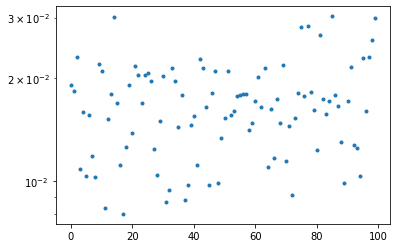

In [35]:
plt.plot(results[:,1],'.')
plt.yscale('log')

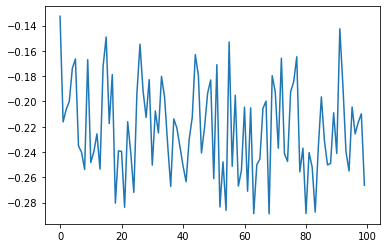

In [34]:
plt.plot(results[:,0])